In [1]:
from keras.datasets import mnist
import numpy as np
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

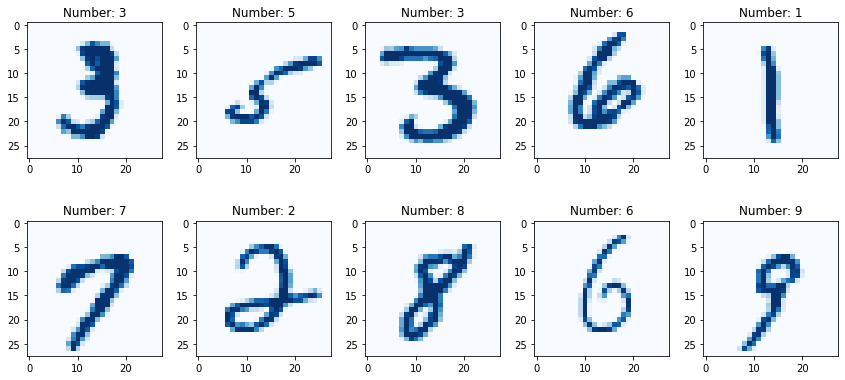

In [4]:
fig = plt.figure(figsize=(12,6))
for i in range(10):
    fig.add_subplot(2,5,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i+10], interpolation='none', cmap='Blues')
    plt.title("Number: %i" %int(y_train[i+10]))
plt.show()

In [5]:
# Shapes before reshaping

print("X_train shape before reshaping : ", X_train.shape)
print("X_test shape before reshaping : ", X_test.shape)

# Shapes after after reshaping

X_train = X_train.reshape(60000, 28*28)
X_test = X_test.reshape(10000, 28*28)


print("X_train shape after reshaping : ", X_train.shape)
print("X_test shape after reshaping : ", X_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train shape before reshaping :  (60000, 28, 28)
X_test shape before reshaping :  (10000, 28, 28)
X_train shape after reshaping :  (60000, 784)
X_test shape after reshaping :  (10000, 784)


In [6]:
# One hot encoding to change the data:
# We'll have a matrix with 60000 row (number of images) x 10 (number of digits)
# Each row will contain zeros and a one at the index corresponding to the integer represented by the image

print("y_train shape before :", y_train.shape)
digits = 10
y_train = np_utils.to_categorical(y_train, digits)
y_test = np_utils.to_categorical(y_test, digits)
print("y_train shape after :", y_train.shape)

y_train shape before : (60000,)
y_train shape after : (60000, 10)


In [7]:
### NEURAL NETWORK FROM SCRATCH

In [8]:
def sigmoid(z):
    "Sigmoid Function"
    
    s = 1 / (1 + np.exp(-z))
    return s

In [9]:
def cost(y, y_hat):
    "Loss Computation or Cost Function"
   
    m = y.shape[0]
    
    L = np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / m
   
    return L

In [24]:
"""Neural Network"""

digits = 10
n_x = X_train.shape[1]
n_units = 256
learning_rate = 0.1
m = X_train.shape[0]

"""Initializing The Parameters"""

W1 = np.random.randn(n_units, n_x)
b1 = np.zeros((n_units, 1))
W2 = np.random.randn(digits, n_units)
b2 = np.zeros((digits, 1))

X = X_train
y = y_train.T

for i in range(0, 2000):
    
    Z1 = np.matmul(W1,X.T) + b1
    A1 = sigmoid(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = sigmoid(Z2) # A2 = Y_hat (predictions)

    costi = cost(y, A2)
    
    dZ2 = A2-y
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * (sigmoid(Z1) * (1 - sigmoid(Z1)))
    dW1 = (1./m) * np.matmul(dZ1, X)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1

print("Final cost:", cost)

<ipython-input-8-5a7993d2bb06>:4: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))
<ipython-input-9-6ad184748d54>:6: RuntimeWarning: divide by zero encountered in log
  L = np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / m
<ipython-input-9-6ad184748d54>:6: RuntimeWarning: invalid value encountered in multiply
  L = np.sum(- y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat)) / m


Final cost: <function cost at 0x00000174574A0D30>


In [25]:
costi

9308.968999533929

In [26]:
# Now we use the learned parameters to run the network over the test set

Z1 = np.matmul(W1, X_test.T) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = sigmoid(Z2)

predictions = np.argmax(A2, axis = 0)
labels = np.argmax(y_test, axis = 1)

print(predictions)
print(labels)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]


<ipython-input-8-5a7993d2bb06>:4: RuntimeWarning: overflow encountered in exp
  s = 1 / (1 + np.exp(-z))


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print("\t\t Confusion Matrix \n")
print(confusion_matrix(predictions, labels))
print()
print("\t\t Metrics \n")
print(classification_report(predictions, labels))

		 Confusion Matrix 

[[ 870    0   20   24    3   53   26   10   18   21]
 [   0 1066   15    8    7    9    2   23   12    4]
 [  15    9  784   25   16   13   24   23   24   13]
 [   8   19   49  790    9   69    4   22   46   23]
 [   1    4   26    9  771   22   35   19   16  108]
 [  42    5   10   58   13  597   20    6   58   26]
 [  18    4   28    9   27   17  818    4   23    3]
 [  10    2   25   24   12   28    6  846   24   52]
 [  12   25   58   44   25   68   17   18  712   37]
 [   4    1   17   19   99   16    6   57   41  722]]

		 Metrics 

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      1045
           1       0.94      0.93      0.93      1146
           2       0.76      0.83      0.79       946
           3       0.78      0.76      0.77      1039
           4       0.79      0.76      0.77      1011
           5       0.67      0.71      0.69       835
           6       0.85      0.86      0.86       951


In [14]:
## Neural Network using Keras

In [15]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation

In [16]:
model = Sequential()
model.add(Dense(units = 128, input_shape = (784,) , activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [17]:
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [18]:
model.fit(X_train, y_train, batch_size = 10, epochs = 10)

Epoch 1/10
6000/6000 [==============================] - 11s 2ms/step - loss: 1.1918 - accuracy: 0.8462
Epoch 2/10
6000/6000 [==============================] - 11s 2ms/step - loss: 0.2740 - accuracy: 0.9310
Epoch 3/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.2067 - accuracy: 0.9503
Epoch 4/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.1855 - accuracy: 0.9575
Epoch 5/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.1712 - accuracy: 0.9603
Epoch 6/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.1608 - accuracy: 0.9628
Epoch 7/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.1624 - accuracy: 0.9631
Epoch 8/10
6000/6000 [==============================] - 12s 2ms/step - loss: 0.1572 - accuracy: 0.9651
Epoch 9/10
6000/6000 [==============================] - 20s 3ms/step - loss: 0.1493 - accuracy: 0.9665
Epoch 10/10
6000/6000 [==============================] - 22s 4ms/step - l

In [19]:
y_pred = model.predict(X_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
metrics = classification_report(y_pred.argmax(axis=1), y_test.argmax(axis=1))

print('\t\t Confusion Matrix \n')
print(matrix, '\n')
print('\t\t Metrics \n')
print(metrics)

		 Confusion Matrix 

[[ 972    1    0    1    1    0    0    1    4    0]
 [   0 1101    4    1    0    1    1    2   25    0]
 [   3    0 1003    1    2    0    1    4   18    0]
 [   0    0    8  960    0    8    0    1   32    1]
 [   0    2    3    0  939    0    3    3    8   24]
 [   5    0    0    8    1  848    4    0   22    4]
 [   4    3    0    0    2    6  926    0   17    0]
 [   2    2   14    6    9    0    0  980   10    5]
 [   0    0   10    3    4    6    1    2  945    3]
 [   3    0    0    5   11    0    0    7   21  962]] 

		 Metrics 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       989
           1       0.97      0.99      0.98      1109
           2       0.97      0.96      0.97      1042
           3       0.95      0.97      0.96       985
           4       0.96      0.97      0.96       969
           5       0.95      0.98      0.96       869
           6       0.97      0.99      0.98       936